In [1]:
import numpy as np
x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1) # 입력데이터 초기화 
t_data = np.array([2, 3, 4, 5, 6]).reshape(5,1) # 정답데이터 초기화 
W = np.random.rand(1,1) # 가중치 W 초기화
b = np.random.rand(1) # 바이어스 b 초기화

In [2]:
def loss_func(x, t):# 손실함수
    y = np.dot(x,W) + b
    return (np.sum((t - y)**2 )) / (len(x))


In [3]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index 
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        x[idx] = float(tmp_val) - delta_x 
        
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        x[idx] = tmp_val
        
        it.iternext() 
    return grad


In [4]:
learning_rate = 1e-2 # 학습율 α
f = lambda x : loss_func(x_data, t_data)
print("Initial loss value = ", loss_func(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b ) 
for step in range(6001):
    W -= learning_rate * numerical_derivative(f, W) 
    b -= learning_rate * numerical_derivative(f, b) 
    if (step % 300 == 0): # 추가부분
        print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W =", W, "b =", b)

Initial loss value =  0.5348717671133905 Initial W =  [[0.98582527]] 
 , b =  [0.31144969]
step =  0 loss value =  0.34502130588511387 W = [[1.03025673]] b = [0.32340529]
step =  300 loss value =  0.00960016883121822 W = [[1.06362623]] b = [0.77034536]
step =  600 loss value =  0.0012187778731247811 W = [[1.02267039]] b = [0.91817273]
step =  900 loss value =  0.00015472847718966124 W = [[1.00807759]] b = [0.97084447]
step =  1200 loss value =  1.9643367492432882e-05 W = [[1.00287809]] b = [0.98961172]
step =  1500 loss value =  2.4938000648056816e-06 W = [[1.00102548]] b = [0.99629859]
step =  1800 loss value =  3.1659738410999803e-07 W = [[1.00036538]] b = [0.99868117]
step =  2100 loss value =  4.0193239642624225e-08 W = [[1.00013019]] b = [0.99953009]
step =  2400 loss value =  5.102684336808563e-09 W = [[1.00004639]] b = [0.99983257]
step =  2700 loss value =  6.478051451480143e-10 W = [[1.00001653]] b = [0.99994034]
step =  3000 loss value =  8.224132209531475e-11 W = [[1.0000058

In [5]:
def predict(x): # 예측 함수
    y = np.dot(x,W) + b 
    return y


In [6]:
predict(np.array([43])) # 예축 테스트

array([44.00000001])

In [9]:
import numpy as np
loaded_data = np.loadtxt('./data_01.csv', delimiter=',', dtype=np.float32) 
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]]

# 데이터 차원 및 shape 확인
print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape) 
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape)


x_data.ndim =  2 , x_data.shape =  (9, 3)
t_data.ndim =  2 , t_data.shape =  (9, 1)


In [10]:
np.random.seed(42)
W = np.random.rand(3,1) # 가중치 W 초기화
b = np.random.rand(1) # 바이어스 b 초기화
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape) # 가중치 W, 바이어스 b 업데이트 및 학습과정 결과


W =  [[0.37454012]
 [0.95071431]
 [0.73199394]] , W.shape =  (3, 1) , b =  [0.59865848] , b.shape =  (1,)


In [14]:
learning_rate = 1e-5
f = lambda x : loss_func(x_data,t_data)
print("Initial loss value = ", loss_func(x_data, t_data) )
for step in range(30001):
    W -= learning_rate * numerical_derivative(f, W) 
    b -= learning_rate * numerical_derivative(f, b) 
    if (step % 3000 == 0):
        print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W =", W, "b =", b )

Initial loss value =  3.637410373246286
step =  0 loss value =  3.6374102761777483 W = [[0.40692916]
 [0.52479057]
 [1.06698914]] b = [0.5882781]
step =  3000 loss value =  3.6371455880487935 W = [[0.4064019 ]
 [0.52429284]
 [1.06800523]] b = [0.58575712]
step =  6000 loss value =  3.636910008683982 W = [[0.40606701]
 [0.52398166]
 [1.06865724]] b = [0.58322269]
step =  9000 loss value =  3.6366855734820343 W = [[0.40584914]
 [0.5237834 ]
 [1.06908833]] b = [0.58068165]
step =  12000 loss value =  3.636465669254549 W = [[0.40570237]
 [0.52365356]
 [1.06938533]] b = [0.57813817]
step =  15000 loss value =  3.636247860674333 W = [[0.40559878]
 [0.52356522]
 [1.06960094]] b = [0.57559477]
step =  18000 loss value =  3.636031250078945 W = [[0.40552143]
 [0.52350206]
 [1.0697671 ]] b = [0.57305299]
step =  21000 loss value =  3.63581550574936 W = [[0.40546001]
 [0.52345419]
 [1.06990322]] b = [0.57051373]
step =  24000 loss value =  3.6356005042675617 W = [[0.40540829]
 [0.52341561]
 [1.070

In [12]:
test_data = np.array([100, 98, 81])
predict(test_data)

array([179.13680055])

In [15]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측 및 평가
score = model.score(X_test, y_test) 
print("정확도 :", score)
cofficient = model.coef_
intercept = model.intercept_
print("계수 :", cofficient) 
print("절편 :", intercept)

정확도 : 0.6844267283527129
계수 : [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
절편 : 29.83642016383921


/Users/choejm/AI02/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [18]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [23]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [21]:
data.target.shape

(506,)

In [22]:
data.target[:30]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. ])

In [24]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
loaded_data = np.loadtxt('./data_01.csv', delimiter=',', dtype=np.float32) 
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]]

model=LinearRegression().fit(x_data,t_data)
print(model.coef_, model.intercept_)

[[0.38179097 0.5078311  1.1275766 ]] [-1.0563049]


In [29]:
test_data = np.array([[100, 98, 81]])
pred_data = model.predict(test_data)
pred_data

array([[178.22394288]])

In [30]:
from scipy import stats

x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) # 선형 최소 제곱 회귀를 계산. 
print("slope: {}\nintercept: {}\nr_value: {}\np_value: {}\nstd_err: {}"\
      .format(slope, intercept, r_value, p_value, std_err))

slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


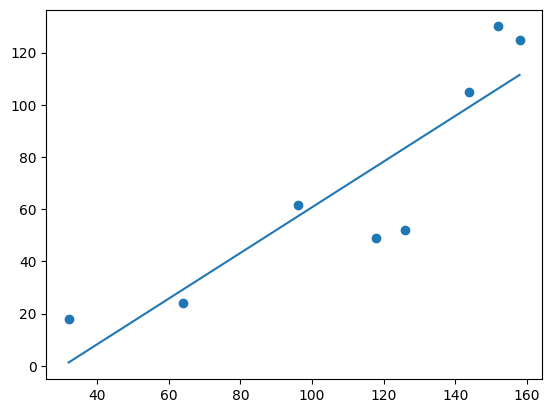

In [31]:
import numpy as np
import matplotlib.pyplot as plt 
plt.scatter(x, y)
plt.plot(x, slope*np.array(x) + intercept, '-') 
plt.show()

In [44]:
from sklearn.datasets import load_boston 
boston = load_boston()
X = boston.data
y = boston.target

# 데이터 분핛하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)



/Users/choejm/AI02/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [46]:
X_train[:10]

array([[1.20830e-01, 0.00000e+00, 2.89000e+00, 0.00000e+00, 4.45000e-01,
        8.06900e+00, 7.60000e+01, 3.49520e+00, 2.00000e+00, 2.76000e+02,
        1.80000e+01, 3.96900e+02, 4.21000e+00],
       [3.40060e-01, 0.00000e+00, 2.18900e+01, 0.00000e+00, 6.24000e-01,
        6.45800e+00, 9.89000e+01, 2.11850e+00, 4.00000e+00, 4.37000e+02,
        2.12000e+01, 3.95040e+02, 1.26000e+01],
       [1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
        5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.49480e+02, 2.49100e+01],
       [3.11300e-02, 0.00000e+00, 4.39000e+00, 0.00000e+00, 4.42000e-01,
        6.01400e+00, 4.85000e+01, 8.01360e+00, 3.00000e+00, 3.52000e+02,
        1.88000e+01, 3.85640e+02, 1.05300e+01],
       [5.05900e-02, 0.00000e+00, 4.49000e+00, 0.00000e+00, 4.49000e-01,
        6.38900e+00, 4.80000e+01, 4.77940e+00, 3.00000e+00, 2.47000e+02,
        1.85000e+01, 3.96900e+02, 9.62000e+00],
       [1.15779e+01, 0.00000e+

In [47]:
# MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)


In [57]:
X_train_scaled[:10]

array([[1.28706479e-03, 0.00000000e+00, 8.90762463e-02, 0.00000000e+00,
        1.23456790e-01, 8.63767005e-01, 7.52832132e-01, 2.14586651e-01,
        4.34782609e-02, 1.69847328e-01, 5.74468085e-01, 1.00000000e+00,
        6.35228849e-02],
       [3.75115713e-03, 0.00000000e+00, 7.85557185e-01, 0.00000000e+00,
        4.91769547e-01, 5.55087181e-01, 9.88671473e-01, 8.93125256e-02,
        1.30434783e-01, 4.77099237e-01, 9.14893617e-01, 9.95309900e-01,
        2.96255201e-01],
       [1.68788358e-01, 0.00000000e+00, 6.46627566e-01, 0.00000000e+00,
        4.71193416e-01, 3.33972025e-01, 9.72193615e-01, 8.76927977e-02,
        1.00000000e+00, 9.14122137e-01, 8.08510638e-01, 8.80427656e-01,
        6.37725381e-01],
       [2.78858418e-04, 0.00000000e+00, 1.44061584e-01, 0.00000000e+00,
        1.17283951e-01, 4.70013413e-01, 4.69618950e-01, 6.25742754e-01,
        8.69565217e-02, 3.14885496e-01, 6.59574468e-01, 9.71607242e-01,
        2.38834951e-01],
       [4.97584126e-04, 0.00000000e+

In [48]:

# scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의 LinearRegression 클래스를 사용핚다.
from sklearn.linear_model import LinearRegression
# 회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또핚 fit 메서드는 객체 자싞을 반홖 
model_boston = LinearRegression().fit(X_train_scaled, y_train)
print(model_boston.coef_) # coef_ : 추정된 가중치 벡터(W)
print(model_boston.intercept_) # intercept_ : 추정된 상수항(b)

[-13.68144003   6.5015927   -0.66180551   1.62203309  -7.43576628
  17.49391411   1.09975424 -17.01294065   6.96076337  -6.40943881
  -7.62846702   5.13590129 -19.64226007]
25.29915349564377


In [58]:
# score() : 결정 계수 R^2 점수를 계산. 결정 계수는 -1~1 사이의 값을 가짐. 
model_boston.score(X_train_scaled, y_train)

0.7495400632086622

In [59]:
# cross_val_score(model, X, y, scoring=None, cv=None) : 교차검증 함수
# model : 회귀 분석 모형, X : 독립 변수 데이터, y : 종속 변수 데이터, scoring : 성능 검증에 사용핛 함수 이름
# cv : 교차검증 생성기 객체 또는 숫자. None이면 KFold(3), 숫자 k이면 KFold(k)
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model_boston, X_train_scaled, y_train, cv=5)
r2


array([0.68677858, 0.80010349, 0.73521821, 0.76076173, 0.55966062])

In [51]:
r2.mean()

0.7085045269202352

In [52]:
import math
from sklearn.metrics import mean_squared_error # mean_squared_error: 평균 제곱 오차(mean squared error)
math.sqrt(mean_squared_error(y_train, model_boston.predict(X_train_scaled))) # 표준오차 구함 RMSE


4.411312745068365

In [53]:
y_pred = model_boston.predict(X_test_scaled)
y_pred

array([31.4243217 , 31.96785487, 30.93785448, 22.34313349, 18.83846235,
       16.20617519, 35.92908162, 14.74157477, 25.07700756, 37.13230282,
       21.47652971, 30.92661826, 28.07823424, 34.02599249, 33.7778476 ,
       40.63701192, 24.25899783, 23.43019291, 25.547906  , 21.34469147,
       32.65467539, 17.80506124, 25.46149722, 25.0207691 , 32.51742137,
       20.51357936, 19.47165255, 16.87107974, 38.44316206,  0.3888111 ,
       32.39559257, 32.15518102, 26.05305015, 23.82049084, 20.56494632,
       19.66990981,  3.53212643, 35.21058387, 27.03280773, 27.67994129,
       34.36642896, 29.82003002, 18.31717228, 31.55109654, 17.93465111,
       28.4618882 , 19.39950216, 21.60782793, 38.10391926, 16.45101411,
       24.51003632, 19.57072199, 24.53359986, 34.34589029, 26.74381857,
       34.86340026, 21.02859444, 19.77400901, 18.68461884, 24.64911818,
       19.89923131, 23.52871967, 39.56690084, 42.81848202, 30.38116596,
       16.96889789, 23.83550068,  3.18952008, 31.52469303, 28.66

In [54]:
import math
from sklearn.metrics import mean_squared_error

rmse_test = math.sqrt(mean_squared_error(y_test, y_pred)) #RMSE : 루트 평균 제곱 오류 
rmse_test


5.415403634644723

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # 결정 계수 구함. 결정계수(r2, R-squared) : 상관계수를 제곱핚 값

0.6996255772983111

In [60]:
import statsmodels.api as sm

Boston = sm.datasets.get_rdataset("Boston", package="MASS") 
boston_df = Boston.data
boston_df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [61]:
import statsmodels.formula.api as smf
formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns) 
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [62]:
# OLS(Ordinary Least Squares) : 가장 기본적인 결정롞적 선형 회귀 방법.
# 잒차제곱합(RSS:Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법 
# formula=formula : 원본에서 medv feature를 제외핚 상태
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          6.72e-135
Time:                        22:15:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
import statsmodels.formula.api as smf
formula = "medv ~ rad + zn + rm + chas + age -1"
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas + age 맊 포함
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):                   5.05e-289
Time:                        22:19:19   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS") 
boston_df = Boston.data
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) 
formula


'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [65]:
from patsy import dmatrices # 디자인 행렬 수행
# boston_df에서 formula에서 정의하지 않은 요소는 y(종속변수:medv컬럼)에
# 정의핚 요소는 X(독립변수:나머지)에 저장
# dmatrices()를 이용해서 boston_df에서 종속변수와 독립변수를 분리하는 작업 수행 
y, X = dmatrices(formula, boston_df, return_type="dataframe")


In [66]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [67]:
X

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# VIF Factor의 값이 10보다큰 값들은 상관관계(?)가 너무 높아서 다른 독립변수들에 역할을 저해하게 된다
## 따라서 독립변수가 많을 경우 VIF값들이 큰 독립변수를 제거해주는것이 바람직하다

In [69]:
import pandas as pd 
vif = pd.DataFrame()

In [73]:
# variance_inflation_factor() : VIF 계산 함수
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns # X.columns : boston_df의 컬럼 이름 리스트 
vif

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [74]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [75]:
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) + "-1" 
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1


,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [76]:
formula = "medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+black+lstat-1" 
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+black+lstat-1


,VIF Factor,features
0,2.099345,crim
1,2.451624,zn
2,14.275283,indus
3,1.142167,chas
4,73.894171,nox
5,60.598846,rm
6,21.361234,age
7,12.221605,dis
8,15.159162,rad
9,59.301541,tax


In [78]:
formula = "medv~crim+zn+indus+chas+rm+age+dis+rad+tax+black+lstat-1" 
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+rm+age+dis+rad+tax+black+lstat-1


,VIF Factor,features
0,2.097537,crim
1,2.449661,zn
2,13.150904,indus
3,1.138277,chas
4,41.406746,rm
5,19.889623,age
6,12.032952,dis
7,15.155012,rad
8,57.720347,tax
9,18.396072,black


In [79]:
formula = "medv~crim+zn+indus+chas+rm+age+dis+rad+black+lstat-1" 
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+rm+age+dis+rad+black+lstat-1


,VIF Factor,features
0,2.097466,crim
1,2.375219,zn
2,9.290080,indus
3,1.118613,chas
4,39.069063,rm
5,19.780944,age
6,11.817803,dis
7,4.965633,rad
8,18.289917,black
9,9.046248,lstat


In [80]:
formula = "medv~crim+zn+indus+chas+age+dis+rad+black+lstat-1" 
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+age+dis+rad+black+lstat-1


,VIF Factor,features
0,2.095367,crim
1,2.334763,zn
2,9.016142,indus
3,1.116229,chas
4,14.000758,age
5,8.447694,dis
6,4.771767,rad
7,13.537020,black
8,8.358925,lstat


In [81]:
formula = "medv~crim+zn+indus+chas+dis+rad+black+lstat-1" 
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+dis+rad+black+lstat-1


,VIF Factor,features
0,2.095211,crim
1,2.313889,zn
2,8.205465,indus
3,1.106350,chas
4,8.209371,dis
5,4.689836,rad
6,10.074224,black
7,6.856889,lstat


In [82]:
formula = "medv~crim+zn+indus+chas+dis+rad+lstat-1" 
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+dis+rad+lstat-1


,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [83]:
import statsmodels.formula.api as smf

model_boston = smf.ols(formula=formula, data=boston_df).fit() 
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              330.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):                   1.03e-182
Time:                        22:35:25   Log-Likelihood:                         -1895.9
No. Observations:                 506   AIC:                                      3806.
Df Residuals:                     499   BIC:                                      3835.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1840      0.071     -2.599      0.010      -0.323      -0.045
zn             0.0529      0.027      1.970      0.049       0.000       0.106
indus          0.8391      0.092      9.098      0.000       0.658       1.020
chas           9.1546      1.820      5.031      0.000       5.580      12.730
dis            3.6821      0.211     17.469      0.000       3.268       4.096
rad            0.1755      0.077      2.283      0.023       0.024       0.327
lstat         -0.3776      0.082     -4.606      0.000      -0.539      -0.217
==============================================================================
Omnibus:                       94.793   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.764
Skew:                           1.110   Prob(JB):                     2.75e-36
Kurtosis:                       4.686   Cond. No.                         107.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 결과적으로 P>|t|(p-value?) 값들이 모두 0.05보다 작게 나오게 되어서 좋은 분석이다.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
data.data.shape

(442, 10)

In [5]:
data.target.shape

(442,)

In [6]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # 하이퍼 파라미터 
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.4384009113704955

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0) # 하이퍼 파라미터 
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)


0.37914194389255096

In [14]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5) # 하이퍼 파라미터 
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)

-0.0044383730131891674

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [16]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [17]:
coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index) 
print("정규화 선형회귀 모댈별 가중치(계수) 비교")
coefs_df

정규화 선형회귀 모댈별 가중치(계수) 비교


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston 
%matplotlib inline

In [21]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [22]:
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
bostonDF['PRICE'] = boston.target
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


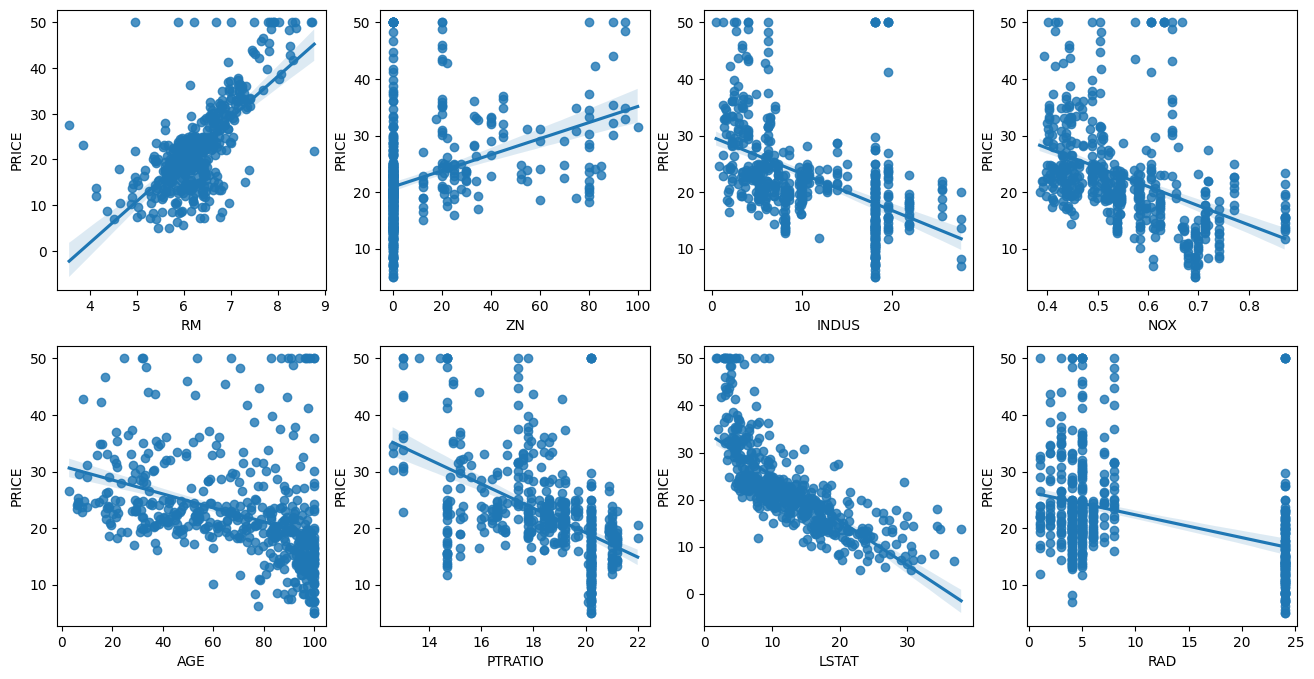

In [46]:
fig, axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ["RM",'ZN', 'INDUS','NOX',"AGE", "PTRATIO","LSTAT", "RAD"]
for i,feature in enumerate(lm_features):
    row=int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


In [30]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [32]:
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
y_preds

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [36]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse)) 
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757
절편 값: 40.99559517216477
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [48]:
alphas=[0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores= cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error" ,cv =5)
    avg_rmse= np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1일 때 5 folds 의 평균 RMSE : 5.788
alpha 1일 때 5 folds 의 평균 RMSE : 5.653
alpha 10일 때 5 folds 의 평균 RMSE : 5.518
alpha 100일 때 5 folds 의 평균 RMSE : 5.330


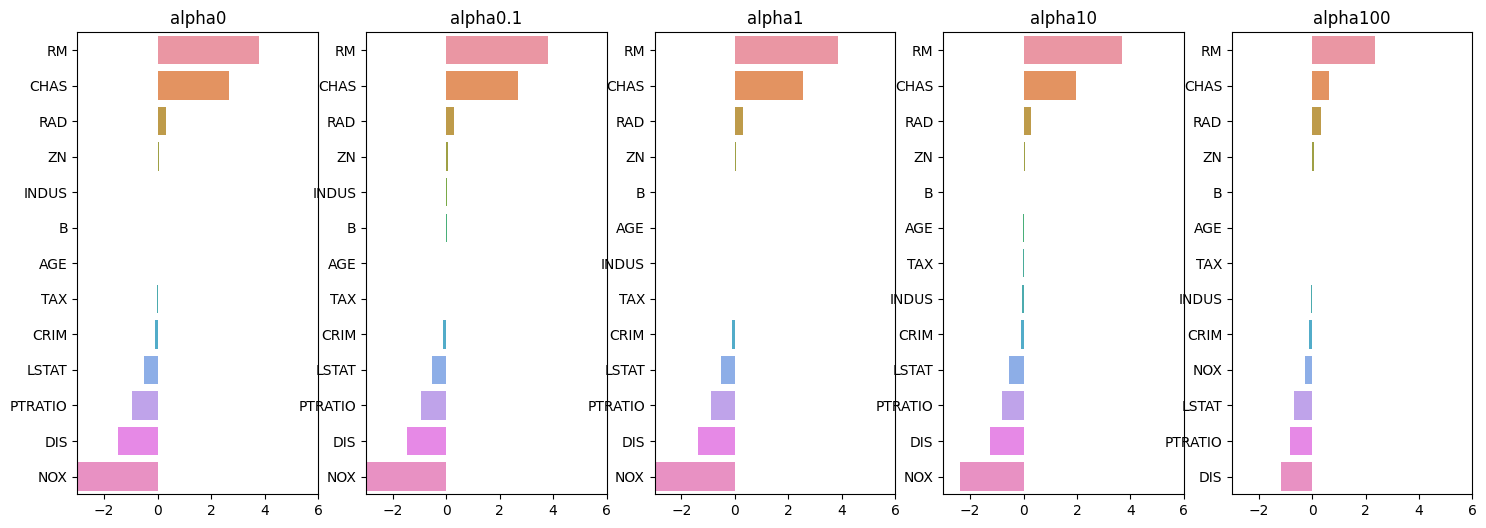

In [49]:
fig, axs=plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df=pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname= 'alpha'+str(alpha)
    coeff_df[colname]=coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()
    

In [52]:
ridge_alphas=[0,0.1,1,10,100]
sort_column = 'alpha' + str(ridge_alphas[0])
coeff_df.sort_values(by= sort_column, ascending = False)

,alpha0,alpha0.1,alpha1,alpha10,alpha100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [37]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score

In [41]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose :
        print('#######', model_name , '#######') 
    for param in params:
        if model_name =='Ridge': 
            model = Ridge(alpha=param)
        elif model_name =='Lasso': 
            model = Lasso(alpha=param)
        elif model_name =='ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7) 
        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5) 
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric맊 반홖하므로 모델을 다시 학습하여 회귀 계수 추출 
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변홖하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns ) 
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [53]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
# 반홖된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력 
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [43]:
# 리지에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
ridge_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df =get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=X_data, y_target_n=y_target)
# 반홖된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력 
sort_column = 'alpha:' + str(ridge_alphas[0]) 
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

####### Ridge #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.799 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.700 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.589 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.815869,3.818233,3.840757,3.854000,3.847645
CHAS,2.674915,2.670019,2.612117,2.552393,2.371317
RAD,0.304241,0.303515,0.295989,0.290142,0.280973
ZN,0.046528,0.046572,0.047041,0.047443,0.048304
INDUS,0.017307,0.015999,0.002252,-0.008805,-0.028456
B,0.009352,0.009368,0.009538,0.009673,0.009908
AGE,0.000006,-0.000269,-0.003144,-0.005415,-0.009189
TAX,-0.012396,-0.012421,-0.012686,-0.012912,-0.013379
CRIM,-0.107628,-0.107474,-0.105866,-0.104595,-0.102470
LSTAT,-0.525617,-0.525966,-0.529832,-0.533343,-0.542009


In [44]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)
# 반홖된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:' + str(elastic_alphas[0]) 
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#### 타이타닉 데이터 VIF 예제
- target : Servived
- Passengerid, Name, Ticket, Cabin 컬름은 삭제
- Nan 데이터는 삭제
- Sex, Embarked는 레이블 인코딩

In [91]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [94]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df2=df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis =1)

In [96]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [97]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [98]:
df2.dropna(inplace = True)

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [112]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,1
708,0,2,1,27.0,0,0,13.0000,2
709,1,1,0,19.0,0,0,30.0000,2
710,1,1,1,26.0,0,0,30.0000,0


In [106]:
df2.reset_index(drop=True, inplace=True)

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df2["Sex"])
labels = encoder.transform(df2["Sex"])
df2["Sex"]=labels

In [108]:
encoder = LabelEncoder()
encoder.fit(df2["Embarked"])
labels = encoder.transform(df2["Embarked"])
df2["Embarked"]=labels

In [109]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [115]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
mm_Age = mm.fit_transform(df2[["Age"]])
df2["Age"]=mm_Age
mm_Fare = mm.fit_transform(df2[["Fare"]])
df2["Fare"]=mm_Fare

In [116]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
707,0,3,0,0.484795,0,5,0.056848,1
708,0,2,1,0.334004,0,0,0.025374,2
709,1,1,0,0.233476,0,0,0.058556,2
710,1,1,1,0.321438,0,0,0.058556,0


In [120]:
formula = "Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked" 
print(formula)
get_vif(formula, df2)

Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked


,VIF Factor,features
0,32.134512,Intercept
1,1.749120,Pclass
2,1.119651,Sex
3,1.310796,Age
4,1.276469,SibSp
5,1.288619,Parch
6,1.641348,Fare
7,1.114880,Embarked


In [121]:
import statsmodels.formula.api as smf

model_titanic = smf.ols(formula=formula, data=df2).fit() 
model_titanic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     67.16
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           4.63e-74
Time:                        20:47:53   Log-Likelihood:                -321.43
No. Observations:                 712   AIC:                             658.9
Df Residuals:                     704   BIC:                             695.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3999      0.081     17.241      0.000       1.240       1.559
Pclass        -0.1903      0.023     -8.403      0.000      -0.235      -0.146
Sex           -0.4842      0.032    -15.368      0.000      -0.546      -0.422
Age           -0.5158      0.090     -5.724      0.000      -0.693      -0.339
SibSp         -0.0519      0.017     -2.982      0.003      -0.086      -0.018
Parch         -0.0102      0.019     -0.535      0.593      -0.048       0.027
Fare           0.1047      0.178      0.589      0.556      -0.244       0.454
Embarked      -0.0298      0.019     -1.535      0.125      -0.068       0.008
==============================================================================
Omnibus:                       25.995   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.157
Skew:                           0.487   Prob(JB):                     7.69e-07
Kurtosis:                       3.027   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [123]:
formula = "Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked" 
print(formula)
get_vif(formula, df2)

Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked


,VIF Factor,features
0,32.134512,Intercept
1,1.749120,Pclass
2,1.119651,Sex
3,1.310796,Age
4,1.276469,SibSp
5,1.288619,Parch
6,1.641348,Fare
7,1.114880,Embarked


In [124]:
formula = "Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked-1" 
print(formula)
get_vif(formula, df2)

Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked-1


,VIF Factor,features
0,5.974701,Pclass
1,3.034949,Sex
2,4.104924,Age
3,1.639080,SibSp
4,1.618650,Parch
5,1.655179,Fare
6,5.278139,Embarked


In [125]:
import statsmodels.formula.api as smf

model_titanic = smf.ols(formula=formula, data=df2).fit() 
model_titanic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.492
Model:                            OLS   Adj. R-squared (uncentered):              0.487
Method:                 Least Squares   F-statistic:                              97.61
Date:                Mon, 28 Aug 2023   Prob (F-statistic):                    2.24e-99
Time:                        20:49:12   Log-Likelihood:                         -446.83
No. Observations:                 712   AIC:                                      907.7
Df Residuals:                     705   BIC:                                      939.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.1077      0.017      6.170      0.000       0.073       0.142
Sex           -0.4200      0.037    -11.264      0.000      -0.493      -0.347
Age            0.4450      0.084      5.274      0.000       0.279       0.611
SibSp         -0.0135      0.021     -0.655      0.513      -0.054       0.027
Parch         -0.0023      0.023     -0.102      0.919      -0.047       0.042
Fare           1.7641      0.178      9.908      0.000       1.415       2.114
Embarked       0.0705      0.022      3.190      0.001       0.027       0.114
==============================================================================
Omnibus:                       53.916   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.943
Skew:                           0.430   Prob(JB):                     1.57e-08
Kurtosis:                       2.313   Cond. No.                         32.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
formula = "Survived~Sex+Age+SibSp+Parch+Fare+Embarked-1" 
print(formula)
get_vif(formula, df2)

Survived~Sex+Age+SibSp+Parch+Fare+Embarked-1


,VIF Factor,features
0,2.675597,Sex
1,3.877448,Age
2,1.584801,SibSp
3,1.560473,Parch
4,1.590987,Fare
5,3.798865,Embarked


In [127]:
import statsmodels.formula.api as smf

model_titanic = smf.ols(formula=formula, data=df2).fit() 
model_titanic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.465
Model:                            OLS   Adj. R-squared (uncentered):              0.460
Method:                 Least Squares   F-statistic:                              102.2
Date:                Mon, 28 Aug 2023   Prob (F-statistic):                    2.07e-92
Time:                        20:52:22   Log-Likelihood:                         -465.56
No. Observations:                 712   AIC:                                      943.1
Df Residuals:                     706   BIC:                                      970.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sex           -0.3408      0.036     -9.490      0.000      -0.411      -0.270
Age            0.5676      0.084      6.746      0.000       0.402       0.733
SibSp          0.0096      0.021      0.464      0.643      -0.031       0.050
Parch          0.0242      0.023      1.060      0.290      -0.021       0.069
Fare           1.5477      0.179      8.643      0.000       1.196       1.899
Embarked       0.1426      0.019      7.418      0.000       0.105       0.180
==============================================================================
Omnibus:                       53.750   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.971
Skew:                           0.443   Prob(JB):                     9.37e-09
Kurtosis:                       2.322   Cond. No.                         21.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""